In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_sample = pd.read_csv("sample_submission.csv")

In [5]:
df_test_sample = pd.merge(left= df_test, right= df_sample, on= "id")

In [6]:
df = pd.concat([df, df_test_sample], axis=0)

In [7]:
df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,...,8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de...",1000000
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,...,8/20/04,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The call of the wild, the thrill of adventure....",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre...","[{'credit_id': '52fe43b29251416c7501a909', 'de...",1000000
4395,7396,NaN,16000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0084855,en,The Verdict,"Frank Galvin is a down-on-his luck lawyer, red...",9.596883,...,12/8/82,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The doctors want to settle, the Church wants t...",The Verdict,"[{'id': 1680, 'name': 'boston'}, {'id': 6148, ...","[{'cast_id': 1, 'character': 'Frank Galvin', '...","[{'credit_id': '52fe448bc3a368484e028c55', 'de...",1000000

In [8]:
df.shape

(7398, 23)

In [9]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7398.0,3.699500e+03,2.135763e+03,1.000000,1850.250000,3.699500e+03,5.548750e+03,7.398000e+03
budget,7398.0,2.260146e+07,3.694867e+07,0.000000,0.000000,7.500000e+06,2.800000e+07,3.800000e+08
popularity,7398.0,8.514968e+00,1.216579e+01,0.000001,3.933124,7.435844e+00,1.092000e+01,5.474883e+02
runtime,7392.0,1.077173e+02,2.148004e+01,0.000000,94.000000,1.040000e+02,1.180000e+02,3.380000e+02
revenue,7398.0,2.765282e+07,9.332953e+07,1.000000,1000000.000000,1.000000e+06,8.025728e+06,1.519558e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spok

In [12]:
df.isnull().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                     0
dtype: int64

In [13]:
df.drop(['belongs_to_collection'], axis=1, inplace=True)
df.drop(['homepage'], axis=1, inplace=True)

In [14]:
df.isnull().sum()

id                         0
budget                     0
genres                    23
imdb_id                    0
original_language          0
original_title             0
overview                  22
popularity                 0
poster_path                2
production_companies     414
production_countries     157
release_date               1
runtime                    6
spoken_languages          62
status                     2
tagline                 1460
title                      3
Keywords                 669
cast                      26
crew                      38
revenue                    0
dtype: int64

In [15]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.003845,0.004816,0.000077,-0.293925
budget,0.003845,1.000000,0.340145,0.216251,0.450264
popularity,0.004816,0.340145,1.000000,0.112664,0.273089
runtime,0.000077,0.216251,0.112664,1.000000,0.134784
revenue,-0.293925,0.450264,0.273089,0.134784,1.000000


## EDA - Budget

<AxesSubplot:xlabel='budget', ylabel='Count'>

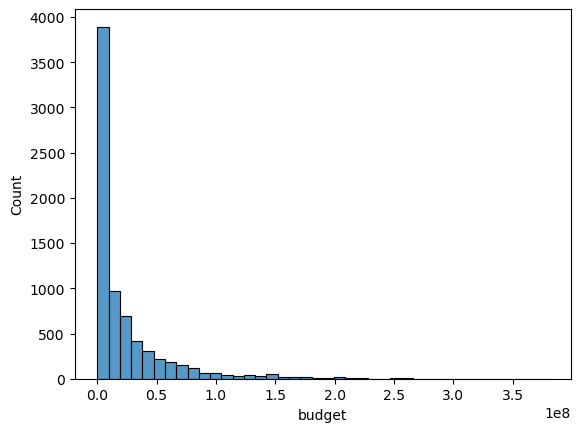

In [16]:
sns.histplot(df["budget"], bins = 40)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

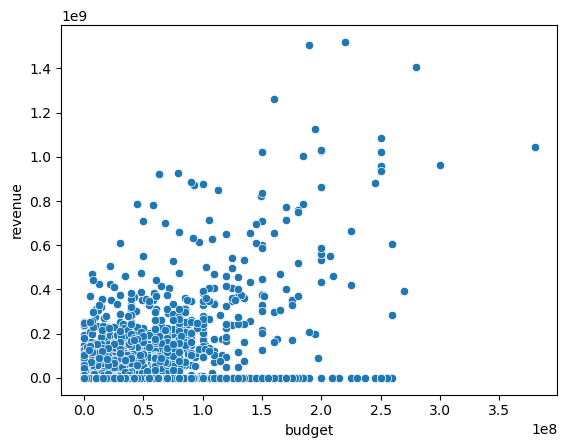

In [17]:
sns.scatterplot(x=df['budget'], y=df['revenue'])

## EDA - Popularity

<AxesSubplot:xlabel='popularity', ylabel='Count'>

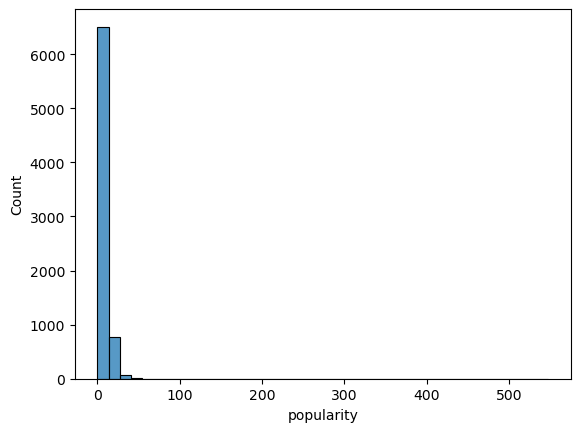

In [18]:
sns.histplot(df["popularity"], bins = 40)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

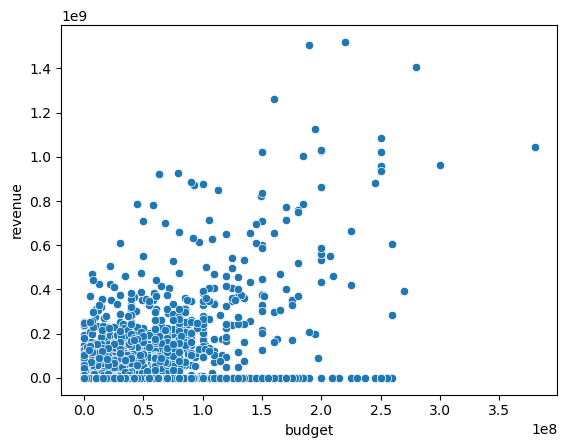

In [19]:
sns.scatterplot(x=df['budget'], y=df['revenue'])

## EDA - runtime

<AxesSubplot:xlabel='runtime', ylabel='Count'>

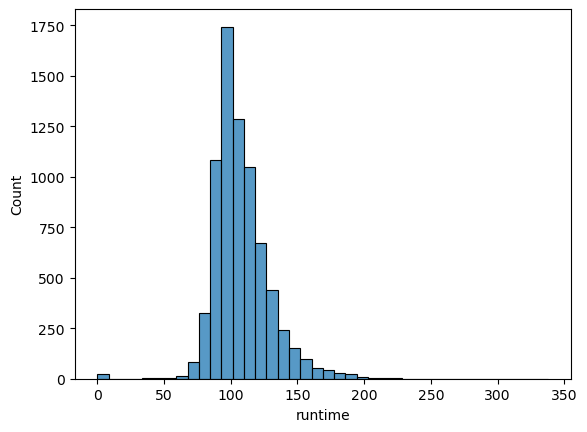

In [20]:
sns.histplot(df["runtime"], bins = 40)

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

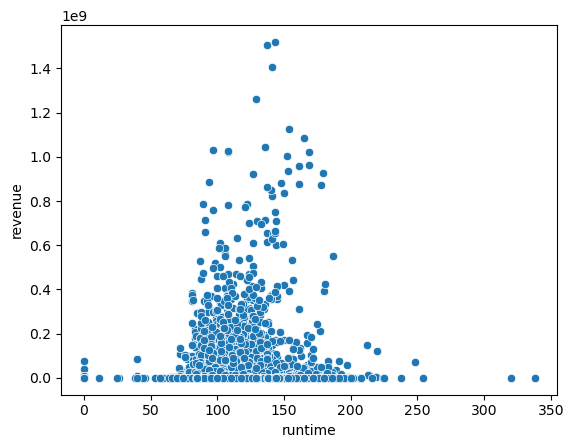

In [21]:
sns.scatterplot(x=df['runtime'], y=df['revenue'])

## EDA - original_language

In [22]:
df["original_language"].unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id', 'ka', 'th', 'ca', 'bm', 'af', 'xx', 'kn', 'is'],
      dtype=object)

<AxesSubplot:xlabel='original_language', ylabel='Count'>

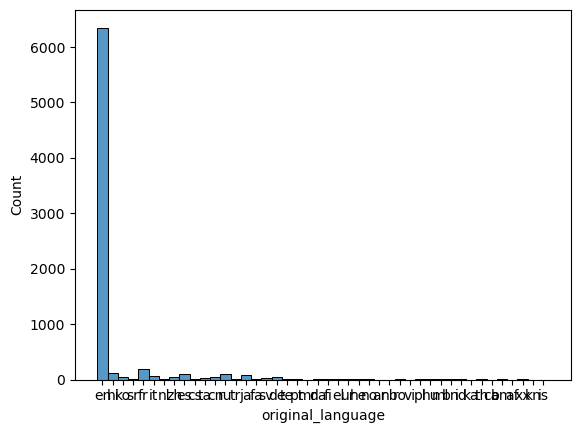

In [23]:
sns.histplot(df["original_language"])

In [24]:
df_original_language = df.groupby("original_language").mean().revenue

<function matplotlib.pyplot.show(close=None, block=None)>

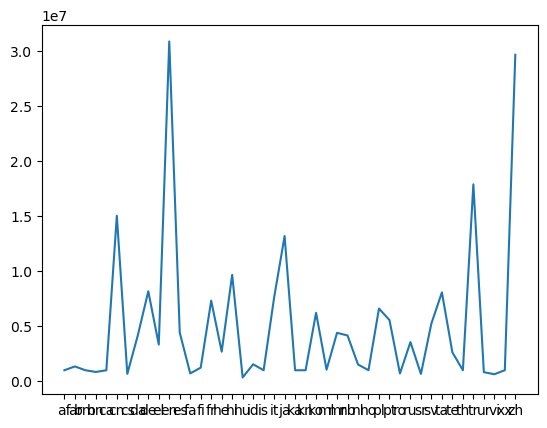

In [25]:
X = df_original_language.index
Y = df_original_language.values

plt.plot(X,Y)
plt.show

## EDA - spoken_languages

In [26]:
def get_dict(row):
    try:
        l_cleaned = eval(row)
    except:
        l_cleaned = {}
    return l_cleaned

In [27]:
l_spoken_languages = list()
for i in df["spoken_languages"]:
    l_spoken_languages.append(get_dict(i))

In [28]:
df["spoken_languages"] = [len(i) if i != {} else np.nan for i in l_spoken_languages]

<AxesSubplot:xlabel='spoken_languages', ylabel='Count'>

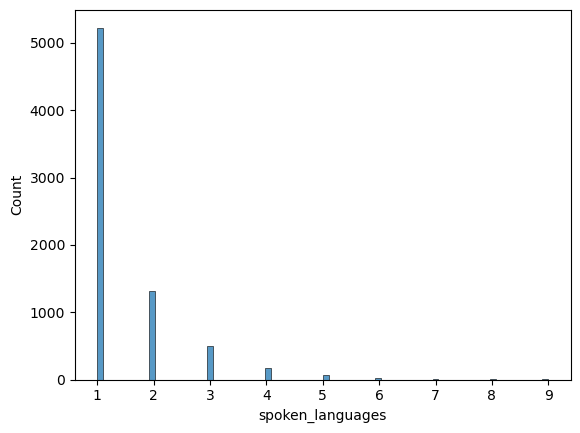

In [29]:
sns.histplot(df["spoken_languages"])

In [30]:
df_spoken_language = df.groupby("spoken_languages").mean().revenue

<function matplotlib.pyplot.show(close=None, block=None)>

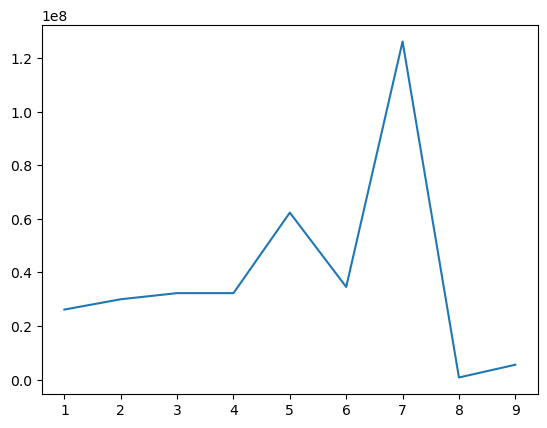

In [31]:
X = df_spoken_language.index
Y = df_spoken_language.values

plt.plot(X,Y)
plt.show

## EDA - genres

In [32]:
l_genres = list()
for i in df["genres"]:
    l_genres.append(get_dict(i))

In [33]:
l_genres[0][0]["name"]

'Comedy'

In [34]:
l_genres_clean = list()
for i in l_genres:
    if len(i) == 1:
        l_genres_clean.append([i[0]["name"]])
    else:
        l_genres_clean.append([i[j]["name"]for j in range(len(i))])

In [35]:
l_genres_clean

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

In [36]:
s_genres = set()

for i in l_genres_clean:
    for j in i:
        s_genres.add(j)

In [37]:
s_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

# EDA - cast

In [38]:
df["cast"].values[0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [39]:
l_cast = list()
for i in df["cast"]:
    l_cast.append(get_dict(i))

In [42]:
l_cast_clean = list()
for i in l_cast:
    l_cast_clean.append([j["name"] for j in i])

In [43]:
l_cast_clean

['Anna Karina',
 'Sady Rebbot',
 'Andr√© S. Labarthe',
 'Guylaine Schlumberger',
 'G√©rard Hoffman',
 'Monique Messine',
 'Brice Parain',
 'Peter Kassovitz',
 'Paul Pavel',
 'Eric Schlumberger',
 'Henri Attal',
 'Odile Geoffroy',
 'Alfred Adam',
 'Gis√®le Braunberger',
 'Jean Ferrat',
 'Jean-Luc Godard',
 'Jean-Paul Savignac',
 'L√°szl√≥ Szab√≥',
 'Gilles Qu√©ant',
 ['Rob Corddry',
  'Craig Robinson',
  'Clark Duke',
  'Adam Scott',
  'Chevy Chase',
  'Gillian Jacobs',
  'Bianca Haase',
  'Collette Wolfe',
  'Kumail Nanjiani',
  'Kellee Stewart',
  'Josh Heald',
  'Gretchen Koerner',
  'Lisa Loeb',
  'Jessica Williams',
  'Bruce Buffer',
  'Mariana Paola Vicente',
  'Christian Slater',
  'Jason Jones',
  'Olivia Jordan',
  'Christine Bently',
  'Stacey Asaro',
  'John Cusack',
  'Adam Herschman',
  'Kisha Sierra'],
 ['Anne Hathaway',
  'Julie Andrews',
  'H√©ctor Elizondo',
  'John Rhys-Davies',
  'Heather Matarazzo',
  'Chris Pine',
  'Callum Blue',
  'Larry Miller',
  'Raven-Symon√©'

In [44]:
s_cast = set()

for i in l_cast_clean:
    for j in i:
        s_cast.add(j)

In [45]:
(s_cast)

{'Kent Linville',
 'William Kania',
 'MƒÉdƒÉlina Ghi»õescu',
 'Shawn Pyfrom',
 'Dielika Coulibaly',
 'Mary-Robin Redd',
 'Lumsden Hare',
 'Jeff Calhoun',
 'Gido Schimanski',
 'Kim Dong-wook',
 'Tai Urban',
 'Victor Morris',
 'Blair Besten',
 'Mikkel Gaup',
 'Maurissa Tancharoen',
 'Yohana Cobo',
 'Michel Dubois',
 'Alf Skaneby',
 'Gor√¥ Amano',
 "Darragh O'Connor",
 'Lo Meng',
 'Marion Keller',
 'Garret Sato',
 'Michael V. Gazzo',
 'David Hedison',
 'Hannes Wegener',
 "Kieran O'Connor",
 'Gan Zhen',
 'G.P. Huntley',
 'Jean-Henri Roger',
 'Sean Guse',
 'Fredelia Smith',
 'Charles Osgood',
 'Sophia Loren',
 'Duke Czlonka',
 'Marietta Marich',
 'Michael Delano',
 'Errol Flynn',
 'Jessica Williams',
 'Joe Mande',
 'James C. Victor',
 'David Bruce',
 'Ashwin Mudaliar',
 'Carolina Zaballa',
 'Carol Lazare',
 'Percy Helton',
 'Lonny Price',
 'Shane Smith',
 'Richard Dioguardi',
 'Dina Merrill',
 'Thomas Schellenberg',
 'Rafaela Aparicio',
 'Jack La Rue',
 'Alain Reynaud',
 'Ben Posener',
 'Al

## EDA - production_companies     

In [47]:
df["production_companies"].values

array(["[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]",
       "[{'name': 'Walt Disney Pictures', 'id': 2}]",
       "[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]",
       ...,
       "[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]",
       "[{'name': 'Northern Lights Films', 'id': 8714}, {'name': 'Animal Kingdom', 'id': 26995}, {'name': 'Two Flints', 'id': 52739}]",
       "[{'name': 'Pathé Consortium Cinéma', 'id': 220}, {'name': 'Les Films de la Pléiade', 'id': 745}, {'name': 'The Criterion Collection', 'id': 10932}]"],
      dtype=object)

In [48]:
l_production_companies = list()
for i in df["production_companies"]:
    l_production_companies.append(get_dict(i))

In [59]:
l_production_companies[3]

{}

In [52]:
l_production_companies_cleaned = list()
for i in l_production_companies:
    l_production_companies_cleaned.append([j["name"] for j in i])

In [60]:
l_production_companies_cleaned

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

In [61]:
s_production_companies = set()

for i in l_production_companies_cleaned:
    for j in i:
        s_production_companies.add(j)

In [63]:
len(s_production_companies)

7087